In [3]:
#importing libraries
from PIL import Image
import numpy as np
import os as os
import cv2

“data” is the array of all images converted to numpy array and “labels” is the array of corresponding labels.

#### How it works —

We go into each directory and go through all the files inside it. Then we read the images using cv2.imread. After that using Image object from PIL we convert the image into array. Since while training the convolutional neural network it is required that you have images of same size we resize the images to width and height of 50px. Then we convert it to numpy array just by passing the image array in the function np.array() and we append the numpy array in our data array. Also add corresponding label to the image. Eg for cat label is 0, for dog label is 1 and so on. Labels are required as the training is done in supervised manner.

In [4]:
data=[]
labels=[]

dogs=os.listdir("./raw-img/cane")
for dog in dogs:
    imag=cv2.imread("./raw-img/cane/"+dog)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((50, 50))
    data.append(np.array(resized_image))
    labels.append(0)

horses=os.listdir("./raw-img/cavallo")
for horse in horses:
    imag=cv2.imread("./raw-img/cavallo/"+horse)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((50, 50))
    data.append(np.array(resized_image))
    labels.append(1)

sheeps=os.listdir("./raw-img/pecora")
for sheep in sheeps:
    imag=cv2.imread("./raw-img/pecora/"+sheep)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((50, 50))
    data.append(np.array(resized_image))
    labels.append(2)
    

chipmunks=os.listdir("./raw-img/scoiattolo")
for chipmunk in chipmunks:
    imag=cv2.imread("./raw-img/scoiattolo/"+chipmunk)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((50, 50))
    data.append(np.array(resized_image))
    labels.append(3)

Since the “data” and “labels” are normal array , convert them to numpy arrays-

In [5]:
animals=np.array(data)
labels=np.array(labels)

Now save these numpy arrays so that you dont need to do this image manipulation again.

In [6]:
np.save("animals",animals)
np.save("labels",labels)

Load the arrays ( Optional : Required only if you have closed your jupyter notebook after saving numpy array )

In [7]:
animals=np.load("animals.npy")
labels=np.load("labels.npy")

Now shuffle the “animals” and “labels” set so that you get good mixture when you separate the dataset into train and test

In [8]:
s=np.arange(animals.shape[0])
np.random.shuffle(s)
animals=animals[s]
labels=labels[s]

Make a variable num_classes which is the total number of animal categories and a variable data_length which is size of dataset

In [9]:
num_classes=len(np.unique(labels))
data_length=len(animals)

#### Divide data into test and train
Take 90% of data in train set and 10% in test set

In [10]:
(x_train,x_test)=animals[(int)(0.1*data_length):],animals[:(int)(0.1*data_length)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_length=len(x_train)
test_length=len(x_test)

#### Divide labels into test and train

In [11]:
(y_train,y_test)=labels[(int)(0.1*data_length):],labels[:(int)(0.1*data_length)]

#### Make labels into One Hot Encoding

In [12]:
import keras
from keras.utils import np_utils
#One hot encoding
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

Using TensorFlow backend.


data preparation part is over. All you have to do is think about hyper parameters like Filter size, number of filters, which type of padding to use, which activatioon functions to use etc.

I added 3 pairs of Conv2D layer and Maxpool2D layer with increasing filter sizes ( 16,32 ,64) . This helps to make image grow more in depthwise and become more flatten. Maxpool layers are great as they optimize the training time. I have also add Dropout layers to reduce overfitting.
In final Dense layer there are 20 nodes because we have 20 categories of animals (cat,dog,bird,fish). Softmax activation is used to give scores to these categories which lie between 0 and 1.

In [13]:
# import sequential model and all the required layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#make model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)         

In [14]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,batch_size=50
          ,epochs=100,verbose=1)

Epoch 1/100
10052/10052 [==============================] - 8s 838us/step - loss: 1.0812 - accuracy: 0.5414
Epoch 2/100
10052/10052 [==============================] - 9s 869us/step - loss: 0.8933 - accuracy: 0.6324
Epoch 3/100
10052/10052 [==============================] - 9s 860us/step - loss: 0.8119 - accuracy: 0.6735
Epoch 4/100
10052/10052 [==============================] - 9s 868us/step - loss: 0.7362 - accuracy: 0.7146
Epoch 5/100
10052/10052 [==============================] - 8s 825us/step - loss: 0.6676 - accuracy: 0.7374
Epoch 6/100
10052/10052 [==============================] - 9s 861us/step - loss: 0.6142 - accuracy: 0.7698
Epoch 7/100
10052/10052 [==============================] - 9s 866us/step - loss: 0.5558 - accuracy: 0.78520s - loss: 0.5568 - accura
Epoch 8/100
10052/10052 [==============================] - 10s 970us/step - loss: 0.5231 - accuracy: 0.8003
Epoch 9/100
10052/10052 [==============================] - 10s 956us/step - loss: 0.4634 - accuracy: 0.8283
Epoch 10/

10052/10052 [==============================] - 14s 1ms/step - loss: 0.0314 - accuracy: 0.9904
Epoch 76/100
10052/10052 [==============================] - 14s 1ms/step - loss: 0.0170 - accuracy: 0.9949
Epoch 77/100
10052/10052 [==============================] - 14s 1ms/step - loss: 0.0232 - accuracy: 0.9918
Epoch 78/100
10052/10052 [==============================] - 14s 1ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 79/100
10052/10052 [==============================] - 14s 1ms/step - loss: 0.0276 - accuracy: 0.9904
Epoch 80/100
10052/10052 [==============================] - 14s 1ms/step - loss: 0.0173 - accuracy: 0.9940
Epoch 81/100
10052/10052 [==============================] - 14s 1ms/step - loss: 0.0201 - accuracy: 0.9940
Epoch 82/100
10052/10052 [==============================] - 14s 1ms/step - loss: 0.0257 - accuracy: 0.9913
Epoch 83/100
10052/10052 [==============================] - 14s 1ms/step - loss: 0.0480 - accuracy: 0.9855
Epoch 84/100
10052/10052 [========================

In [16]:
score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', score[1])

1116/1116 [==============================] - 1s 466us/step

 Test accuracy: 0.7983871102333069


In [17]:
#single image test
def convert_to_array(img):
    im = cv2.imread(img)
    img = Image.fromarray(im, 'RGB')
    image = img.resize((50, 50))
    return np.array(image)
def get_animal_name(label):
    if label==0:
        return "dog"
    if label==1:
        return "horse"
    if label==2:
        return "sheep"
    if label==3:
        return "chipmunk"
def predict_animal(file):
    print("Predicting .................................")
    ar=convert_to_array(file)
    ar=ar/255
    label=1
    a=[]
    a.append(ar)
    a=np.array(a)
    score=model.predict(a,verbose=1)
    print(score)
    label_index=np.argmax(score)
    print(label_index)
    acc=np.max(score)
    animal=get_animal_name(label_index)
    print(animal)
    print("The predicted Animal is a "+animal+" with accuracy =    "+str(acc))

In [18]:
predict_animal("download.jpg")

Predicting .................................
1/1 [==============================] - 0s 51ms/step
[[3.769014e-21 9.773268e-24 7.239758e-22 1.000000e+00]]
3
chipmunk
The predicted Animal is a chipmunk with accuracy =    1.0


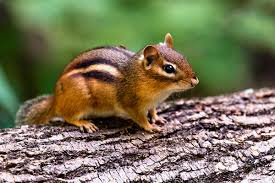

In [19]:
from IPython.display import Image
Image(filename='download.jpg') 

In [20]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
